<a href="https://colab.research.google.com/github/netoquimico/Pythonworks/blob/main/An%C3%A1lise_Explorat%C3%B3ria_de_Dados_(Incidentes_Aeron%C3%A1uticos_ANAC).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Análise Exploratória de Dados (Incidentes Aeronáuticos ANAC)**
O objetivo dessa ánalise é buscar informações para entender os tipos de aeronaves envolvidas em incidentes aéreos.  
  
Constam nesta base de dados as ocorrências aeronáuticas notificadas ao CENIPA no anos de 2010 a 2021 que ocorreram em solo brasileiro.
    
Dentre as informações disponíveis estão os dados sobre as aeronaves envolvidas, fatalidades, local, data, horário dos eventos e informações taxonômicas típicas das investigações de acidentes (AIG).  
  

Fonte de dados: https://dados.gov.br/dados/conjuntos-dados/ocorrencias-aeronauticas-da-aviacao-civil-brasileira



In [ ]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df_aeronaves = pd.read_excel('/content/aeronave2.xlsx')

In [ ]:
df_aeronaves.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5544 entries, 0 to 5543
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   codigo_ocorrencia2           5544 non-null   int64  
 1   aeronave_matricula           5544 non-null   object 
 2   aeronave_operador_categoria  5544 non-null   object 
 3   aeronave_tipo_veiculo        5544 non-null   object 
 4   aeronave_fabricante          5544 non-null   object 
 5   aeronave_modelo              5543 non-null   object 
 6   aeronave_tipo_icao           5544 non-null   object 
 7   aeronave_motor_tipo          5520 non-null   object 
 8   aeronave_motor_quantidade    5544 non-null   object 
 9   aeronave_pmd                 5544 non-null   int64  
 10  aeronave_pmd_categoria       5544 non-null   int64  
 11  aeronave_assentos            5250 non-null   float64
 12  aeronave_ano_fabricacao      5282 non-null   float64
 13  aeronave_pais_fabr

Campo	|	Descrição	|  
-----	|	-----	|	  
codigo_ocorrencia2 | ... |  
aeronave_matricula | ... |
aeronave_operador_categoria | ... |
aeronave_tipo_veiculo | ... |
aeronave_fabricante | ... |
aeronave_modelo | ... |
aeronave_tipo_icao | ... |
aeronave_motor_tipo | ... |
aeronave_motor_quantidade | ... |
aeronave_pmd | ... |
aeronave_pmd_categoria | ... |
aeronave_assentos | ... |
aeronave_ano_fabricacao | ... |
aeronave_pais_fabricante  | ... |
aeronave_pais_registro  | ... |
aeronave_registro_categoria  | ... |
aeronave_registro_segmento  | ... |
aeronave_voo_origem  | ... |
aeronave_voo_destino  | ... |
aeronave_fase_operacao  | ... |
aeronave_tipo_operacao  | ... |
aeronave_nivel_dano  | ... |
aeronave_fatalidades_total  | ... |

In [ ]:
df_aeronaves.columns

Index(['codigo_ocorrencia2', 'aeronave_matricula',
       'aeronave_operador_categoria', 'aeronave_tipo_veiculo',
       'aeronave_fabricante', 'aeronave_modelo', 'aeronave_tipo_icao',
       'aeronave_motor_tipo', 'aeronave_motor_quantidade', 'aeronave_pmd',
       'aeronave_pmd_categoria', 'aeronave_assentos',
       'aeronave_ano_fabricacao', 'aeronave_pais_fabricante',
       'aeronave_pais_registro', 'aeronave_registro_categoria',
       'aeronave_registro_segmento', 'aeronave_voo_origem',
       'aeronave_voo_destino', 'aeronave_fase_operacao',
       'aeronave_tipo_operacao', 'aeronave_nivel_dano',
       'aeronave_fatalidades_total'],
      dtype='object')

In [ ]:
df_aeronaves.sample(10)

,codigo_ocorrencia2,aeronave_matricula,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total
5118,49539,PTRMP,PARTICULAR,AVIÃO,EMBRAER,EMB-810C,PA34,PISTÃO,BIMOTOR,2073,2073,7.0,1982.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,TÁXI,PRIVADA,SUBSTANCIAL,0
3890,53599,PRFFD,INSTRUÇÃO,AVIÃO,CESSNA AIRCRAFT,152,C152,PISTÃO,MONOMOTOR,757,757,2.0,1981.0,BRASIL,BRASIL,AVIÃO,INSTRUÇÃO,MINISTRO VICTOR KONDER,MINISTRO VICTOR KONDER,CORRIDA APÓS POUSO,INSTRUÇÃO,LEVE,0
3860,60602,PRPDI,***,AVIÃO,AEROSPATIALE AND ALENIA,ATR-72-212A,AT72,TURBOÉLICE,BIMOTOR,23000,23000,75.0,2012.0,BRASIL,BRASIL,AVIÃO,REGULAR,LEITE LOPES,TRÊS LAGOAS,CRUZEIRO,REGULAR,LEVE,0
2444,78588,PTTMO,***,AVIÃO,AIRBUS INDUSTRIE,A319-132,A319,JATO,BIMOTOR,70000,70000,0.0,2011.0,BRASIL,BRASIL,AVIÃO,REGULAR,CONGONHAS,MINISTRO VICTOR KONDER,SUBIDA,REGULAR,NENHUM,0
625,80857,PSLNL,***,AVIÃO,LEARJET,45,LJ45,NaN,BIMOTOR,9752,9752,0.0,2007.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,ARAGUAÍNA,SANTOS DUMONT,APROXIMAÇÃO FINAL,PRIVADA,NENHUM,0
1761,79457,PUOOO,***,ULTRALEVE,***,KOLBFLYER,ULAC,PISTÃO,MONOMOTOR,598,598,2.0,2009.0,BRASIL,BRASIL,ULTRALEVE,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,CRUZEIRO,PRIVADA,SUBSTANCIAL,0
4508,52308,PREJQ,INSTRUÇÃO,AVIÃO,CESSNA AIRCRAFT,152,C152,PISTÃO,MONOMOTOR,757,757,2.0,1982.0,BRASIL,BRASIL,AVIÃO,INSTRUÇÃO,FORA DE AERODROMO,FORA DE AERODROMO,DECOLAGEM,INSTRUÇÃO,NENHUM,0
1117,80292,PSAEC,***,AVIÃO,EMBRAER,ERJ 190-400,***,***,SEM TRAÇÃO,0,0,0.0,0.0,BRASIL,BRASIL,AVIÃO,REGULAR,VIRACOPOS,AFONSO PENA,APROXIMAÇÃO FINAL,REGULAR,NENHUM,0
2625,78276,PTUJI,***,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-202,IPAN,PISTÃO,MONOMOTOR,1800,1800,1.0,1994.0,BRASIL,BRASIL,AVIÃO,AGRÍCOLA,FAZENDA POUSO ALEGRE,FAZENDA POUSO ALEGRE,MANOBRA,AGRÍCOLA,DESTRUÍDA,0
2758,78023,PRKDT,***,AVIÃO,PIPER AIRCRAFT,PA-28-161,P28A,PISTÃO,MONOMOTOR,1107,1107,4.0,1992.0,BRASIL,BRASIL,AVIÃO,INSTRUÇÃO,AERÓDROMO NACIONAL DE AVIAÇÃO,AERÓDROMO NACIONAL DE AVIAÇÃO,CORRIDA APÓS POUSO,INSTRUÇÃO,LEVE,0


As colunas ano de fabricação e numero de assentos são importantes dados mas estão em um formato errado, desta forma iremos passar esses dados para numeros inteiros e revisar os valores que estiverem nulos ou com valores inconsistentes

Converter a coluna assento de float para inteiro

In [ ]:
df_aeronaves['aeronave_assentos'] = df_aeronaves['aeronave_assentos'].astype(pd.Int64Dtype())

Converter a coluna ano fabricação para inteiro

In [ ]:
df_aeronaves['aeronave_ano_fabricacao'] = df_aeronaves['aeronave_ano_fabricacao'].astype(pd.Int64Dtype())

In [ ]:
df_aeronaves.dtypes

codigo_ocorrencia2              int64
aeronave_matricula             object
aeronave_operador_categoria    object
aeronave_tipo_veiculo          object
aeronave_fabricante            object
aeronave_modelo                object
aeronave_tipo_icao             object
aeronave_motor_tipo            object
aeronave_motor_quantidade      object
aeronave_pmd                    int64
aeronave_pmd_categoria          int64
aeronave_assentos               Int64
aeronave_ano_fabricacao         Int64
aeronave_pais_fabricante       object
aeronave_pais_registro         object
aeronave_registro_categoria    object
aeronave_registro_segmento     object
aeronave_voo_origem            object
aeronave_voo_destino           object
aeronave_fase_operacao         object
aeronave_tipo_operacao         object
aeronave_nivel_dano            object
aeronave_fatalidades_total      int64
dtype: object

Valores Nulos

In [ ]:
df_aeronaves.isnull().sum()

codigo_ocorrencia2               0
aeronave_matricula               0
aeronave_operador_categoria      0
aeronave_tipo_veiculo            0
aeronave_fabricante              0
aeronave_modelo                  1
aeronave_tipo_icao               0
aeronave_motor_tipo             24
aeronave_motor_quantidade        0
aeronave_pmd                     0
aeronave_pmd_categoria           0
aeronave_assentos              294
aeronave_ano_fabricacao        262
aeronave_pais_fabricante         0
aeronave_pais_registro           0
aeronave_registro_categoria      0
aeronave_registro_segmento       0
aeronave_voo_origem              1
aeronave_voo_destino             1
aeronave_fase_operacao           0
aeronave_tipo_operacao           0
aeronave_nivel_dano              0
aeronave_fatalidades_total       0
dtype: int64

In [ ]:
df_aeronaves.loc[df_aeronaves['aeronave_ano_fabricacao'] > 2022]

,codigo_ocorrencia2,aeronave_matricula,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total
3236,66826,PUCCO,***,ULTRALEVE,NORTH LAND,NORTH LAND PA-18,ULAC,PISTÃO,MONOMOTOR,750,750,2,9999,BRASIL,BRASIL,ULTRALEVE,EXPERIMENTAL,FORA DE AERODROMO,FORA DE AERODROMO,INDETERMINADA,PRIVADA,NENHUM,0


In [ ]:
df_aeronaves.loc[df_aeronaves['aeronave_assentos'] == 0]

,codigo_ocorrencia2,aeronave_matricula,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total
10,81733,PSKZA,***,AVIÃO,ECLIPSE AEROSPACE,EA500,***,TURBOÉLICE,SEM TRAÇÃO,2722,2722,0,0,BRASIL,BRASIL,AVIÃO,PARTICULAR,BRENNAND,CARLOS DRUMMOND DE ANDRADE / PAMPULHA,POUSO,PRIVADA,NENHUM,0
25,81715,PSLSS,***,AVIÃO,BEECHCRAFT,B200,***,TURBOÉLICE,SEM TRAÇÃO,5670,5670,0,0,BRASIL,BRASIL,AVIÃO,TÁXI AÉREO,PRESIDENTE JUSCELINO KUBITSCHEK,GOVERNADOR ANDRÉ FRANCO MONTORO,TÁXI,TÁXI AÉREO,LEVE,0
26,81713,PSIBA,***,HELICÓPTERO,AGUSTA,AW119MKII,***,TURBOEIXO,SEM TRAÇÃO,2850,2850,0,0,BRASIL,BRASIL,HELICÓPTERO,MÚLTIPLA,ATLAS BRASIL CANTANHEDE,ATLAS BRASIL CANTANHEDE,CRUZEIRO,PRIVADA,LEVE,0
38,81699,PRFKF,***,HELICÓPTERO,LEONARDO S.P.A.,AW119MKII,A119,TURBOEIXO,MONOMOTOR,2850,2850,0,2022,BRASIL,BRASIL,HELICÓPTERO,ADMINISTRAÇÃO DIRETA,ATLAS BRASIL CANTANHEDE,FORA DE AERODROMO,ARREMETIDA NO AR,POLICIAL,LEVE,0
46,81689,PRBGU,***,***,***,***,***,***,SEM TRAÇÃO,0,0,0,0,BRASIL,BRASIL,***,TÁXI AÉREO,JACAREPAGUÁ,AERÓDROMO NÃO CADASTRADO,DECOLAGEM,TÁXI AÉREO,NENHUM,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5327,47979,PUBRA,EXPERIMENTAL,ULTRALEVE,FABRICACAO PROPRIA,EXPERIMENTAL,ULAC,PISTÃO,MONOMOTOR,0,0,0,0,BRASIL,BRASIL,ULTRALEVE,EXPERIMENTAL,FORA DE AERODROMO,FORA DE AERODROMO,INDETERMINADA,EXPERIMENTAL,SUBSTANCIAL,0
5331,47938,CSTOF,***,AVIÃO,AIRBUS INDUSTRIE,A330-223,A332,JATO,BIMOTOR,230000,230000,0,0,PORTUGAL,PORTUGAL,AVIÃO,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,TÁXI,REGULAR,LEVE,0
5462,47055,N69059,***,AVIÃO,BOEING COMPANY,767-424ER,***,JATO,BIMOTOR,204120,204120,0,2002,ESTADOS UNIDOS,ESTADOS UNIDOS,AVIÃO,***,FORA DE AERODROMO,FORA DE AERODROMO,CORRIDA APÓS POUSO,***,NENHUM,0
5496,46914,N114U,***,AVIÃO,ROCKWELL,114,***,***,MONOMOTOR,1424,1424,0,0,ESTADOS UNIDOS,ESTADOS UNIDOS,AVIÃO,PARTICULAR,ATLAS BRASIL CANTANHEDE,FLORES,POUSO,PRIVADA,SUBSTANCIAL,0


Substituindo os valores para dados para aeronaves sem data de fabricação

In [ ]:
df_aeronaves['aeronave_ano_fabricacao'] = df_aeronaves['aeronave_ano_fabricacao'].replace(0, np.nan)

In [ ]:
df_aeronaves['aeronave_ano_fabricacao'] = df_aeronaves['aeronave_ano_fabricacao'].replace(9999, np.nan)

tratando os dados para os números de assentos

In [ ]:
df_aeronaves['aeronave_assentos'].value_counts()

6      857
2      763
4      630
1      614
0      334
      ... 
312      1
108      1
196      1
71       1
92       1
Name: aeronave_assentos, Length: 87, dtype: Int64

In [ ]:
df_aeronaves.loc[df_aeronaves['aeronave_assentos'] == 0]

,codigo_ocorrencia2,aeronave_matricula,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total
10,81733,PSKZA,***,AVIÃO,ECLIPSE AEROSPACE,EA500,***,TURBOÉLICE,SEM TRAÇÃO,2722,2722,0,<NA>,BRASIL,BRASIL,AVIÃO,PARTICULAR,BRENNAND,CARLOS DRUMMOND DE ANDRADE / PAMPULHA,POUSO,PRIVADA,NENHUM,0
25,81715,PSLSS,***,AVIÃO,BEECHCRAFT,B200,***,TURBOÉLICE,SEM TRAÇÃO,5670,5670,0,<NA>,BRASIL,BRASIL,AVIÃO,TÁXI AÉREO,PRESIDENTE JUSCELINO KUBITSCHEK,GOVERNADOR ANDRÉ FRANCO MONTORO,TÁXI,TÁXI AÉREO,LEVE,0
26,81713,PSIBA,***,HELICÓPTERO,AGUSTA,AW119MKII,***,TURBOEIXO,SEM TRAÇÃO,2850,2850,0,<NA>,BRASIL,BRASIL,HELICÓPTERO,MÚLTIPLA,ATLAS BRASIL CANTANHEDE,ATLAS BRASIL CANTANHEDE,CRUZEIRO,PRIVADA,LEVE,0
38,81699,PRFKF,***,HELICÓPTERO,LEONARDO S.P.A.,AW119MKII,A119,TURBOEIXO,MONOMOTOR,2850,2850,0,2022,BRASIL,BRASIL,HELICÓPTERO,ADMINISTRAÇÃO DIRETA,ATLAS BRASIL CANTANHEDE,FORA DE AERODROMO,ARREMETIDA NO AR,POLICIAL,LEVE,0
46,81689,PRBGU,***,***,***,***,***,***,SEM TRAÇÃO,0,0,0,<NA>,BRASIL,BRASIL,***,TÁXI AÉREO,JACAREPAGUÁ,AERÓDROMO NÃO CADASTRADO,DECOLAGEM,TÁXI AÉREO,NENHUM,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5327,47979,PUBRA,EXPERIMENTAL,ULTRALEVE,FABRICACAO PROPRIA,EXPERIMENTAL,ULAC,PISTÃO,MONOMOTOR,0,0,0,<NA>,BRASIL,BRASIL,ULTRALEVE,EXPERIMENTAL,FORA DE AERODROMO,FORA DE AERODROMO,INDETERMINADA,EXPERIMENTAL,SUBSTANCIAL,0
5331,47938,CSTOF,***,AVIÃO,AIRBUS INDUSTRIE,A330-223,A332,JATO,BIMOTOR,230000,230000,0,<NA>,PORTUGAL,PORTUGAL,AVIÃO,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,TÁXI,REGULAR,LEVE,0
5462,47055,N69059,***,AVIÃO,BOEING COMPANY,767-424ER,***,JATO,BIMOTOR,204120,204120,0,2002,ESTADOS UNIDOS,ESTADOS UNIDOS,AVIÃO,***,FORA DE AERODROMO,FORA DE AERODROMO,CORRIDA APÓS POUSO,***,NENHUM,0
5496,46914,N114U,***,AVIÃO,ROCKWELL,114,***,***,MONOMOTOR,1424,1424,0,<NA>,ESTADOS UNIDOS,ESTADOS UNIDOS,AVIÃO,PARTICULAR,ATLAS BRASIL CANTANHEDE,FLORES,POUSO,PRIVADA,SUBSTANCIAL,0


In [ ]:
df_aeronaves['aeronave_assentos'] = df_aeronaves['aeronave_assentos'].replace(0, np.nan)

# **Estatística**

In [ ]:
df_aeronaves.describe()

,codigo_ocorrencia2,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_fatalidades_total
count,5544.000000,5544.000000,5544.000000,4916.0,4918.0,5544.000000
mean,69048.574495,15356.032648,15356.032648,30.398902,1994.854209,0.134019
std,12940.997488,33062.255409,33062.255409,57.225212,16.151613,0.610129
min,46782.000000,0.000000,0.000000,1.0,1936.0,0.000000
25%,53228.750000,1200.000000,1200.000000,2.0,1980.0,0.000000
50%,77994.500000,2073.000000,2073.000000,6.0,1998.0,0.000000
75%,79977.250000,6800.000000,6800.000000,11.0,2010.0,0.000000
max,81756.000000,396895.000000,396895.000000,384.0,2022.0,10.000000


<Axes: title={'center': 'Incidentes aereos por tipo de aeronaves'}>

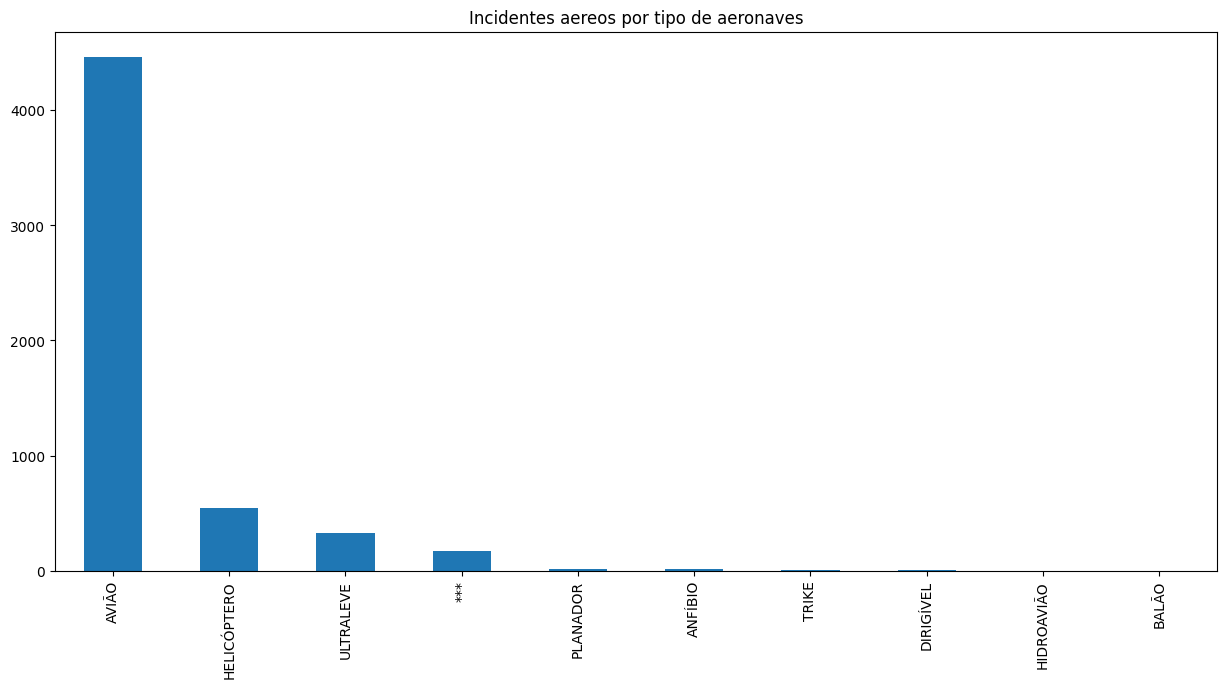

In [ ]:
df_aeronaves.aeronave_tipo_veiculo.value_counts().plot(kind='bar', title='Incidentes aereos por tipo de aeronaves',  figsize=(15,7))


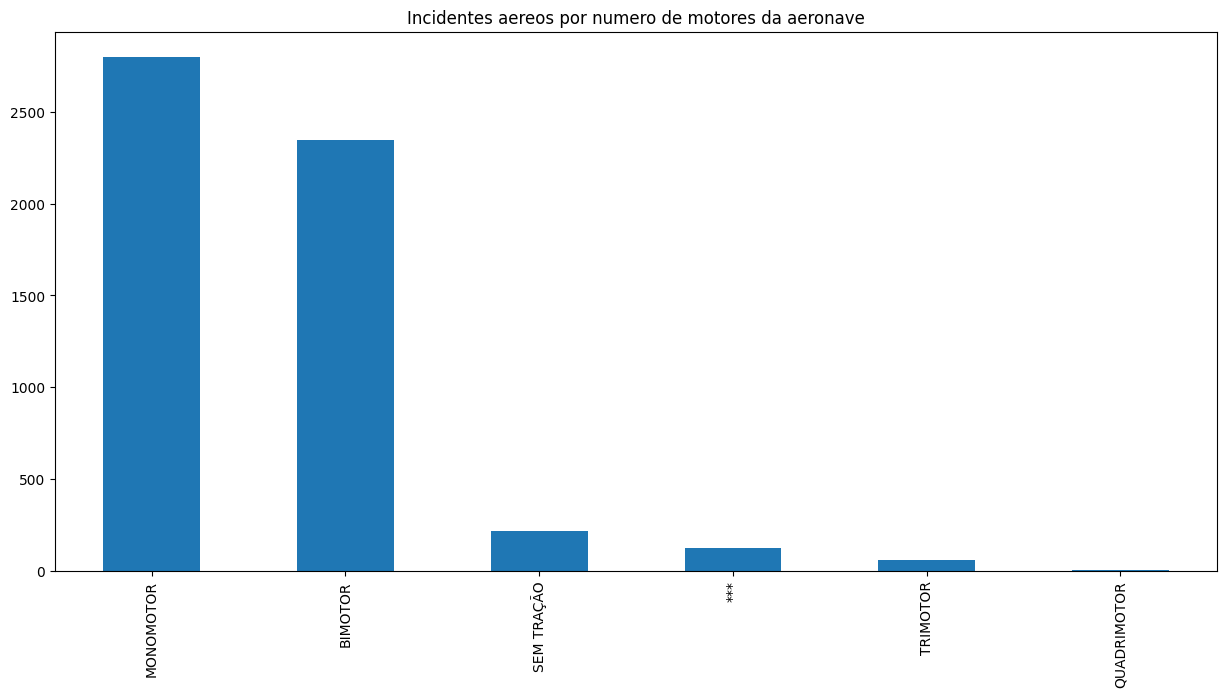

In [ ]:
df_aeronaves.aeronave_motor_quantidade.value_counts().plot(kind='bar', title='Incidentes aereos por numero de motores da aeronave',  figsize=(15,7));

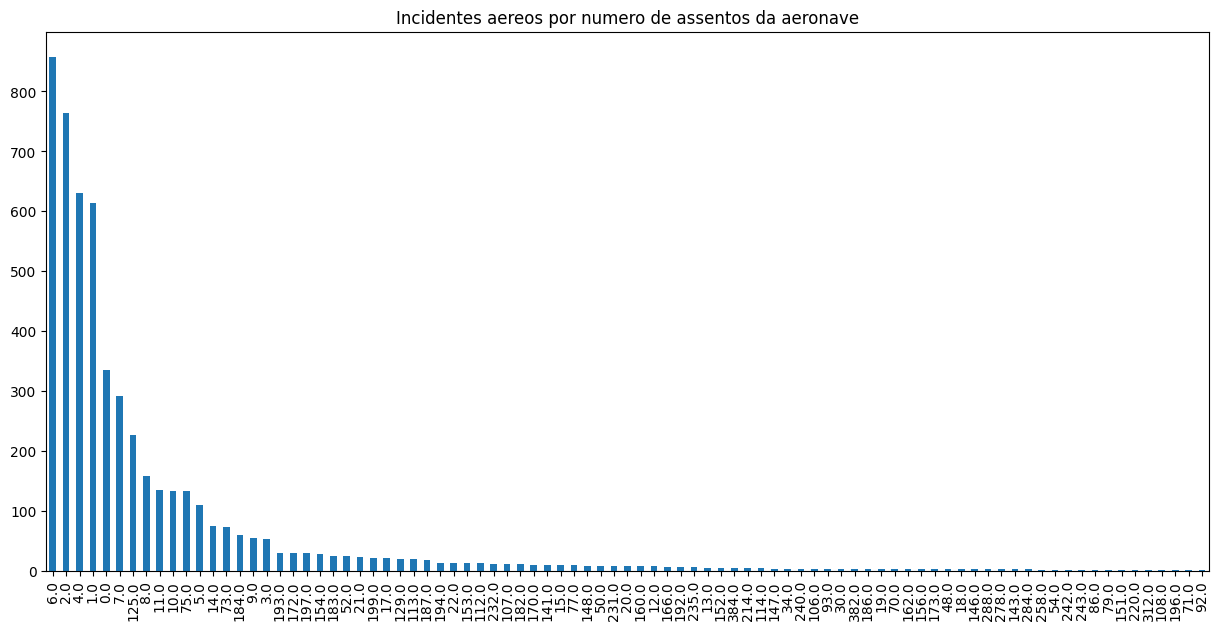

In [ ]:
plt.figure(figsize=(15, 6))
aeronaves.aeronave_assentos.value_counts().plot(kind='bar', title='Incidentes aereos por numero de assentos da aeronave',  figsize=(15,7));
plt.show()

array([[<Axes: title={'center': 'aeronave_assentos'}>,
        <Axes: title={'center': 'aeronave_ano_fabricacao'}>],
       [<Axes: title={'center': 'aeronave_fatalidades_total'}>, <Axes: >]],
      dtype=object)

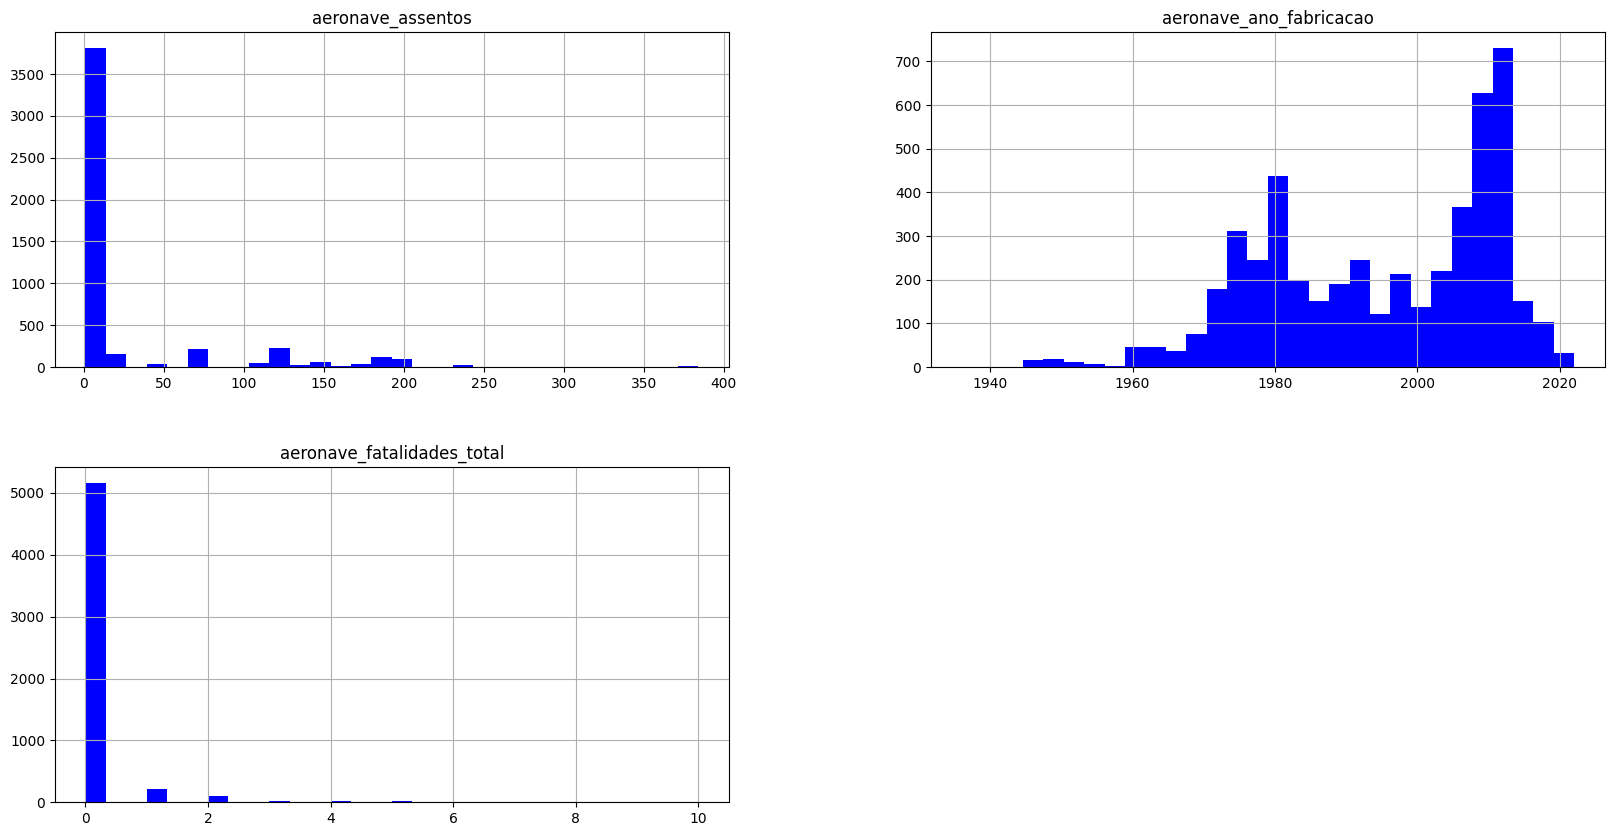

In [ ]:
df_aeronaves[['aeronave_assentos', 'aeronave_ano_fabricacao', 'aeronave_fatalidades_total']].hist(bins=30, alpha=1.0, color='blue', figsize=(20,10))

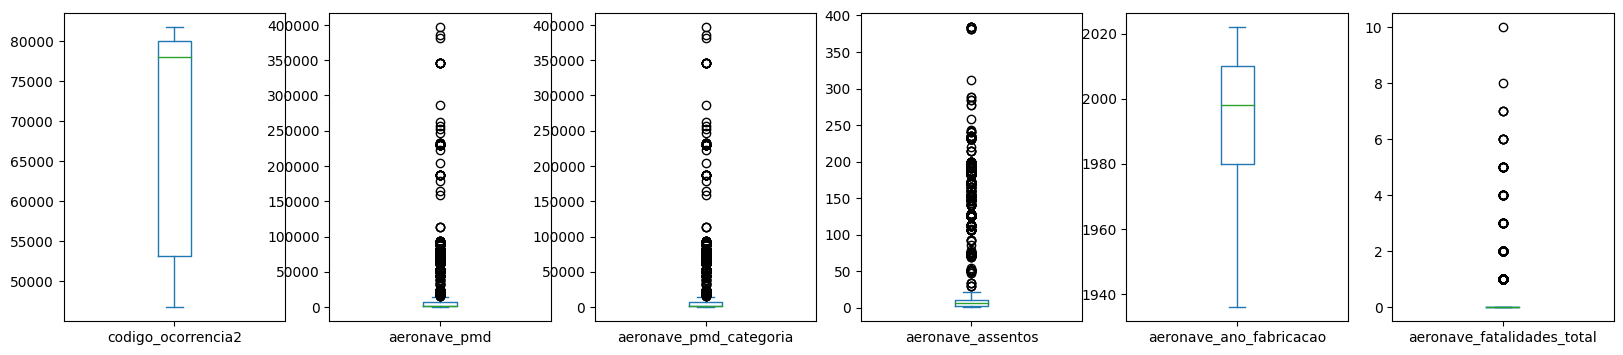

In [ ]:
df_aeronaves.plot(kind='box',figsize=(20,4),subplots=True);

**Análise Outliers**

In [ ]:
df_aeronaves.loc[df_aeronaves['aeronave_fatalidades_total'] > 0]

,codigo_ocorrencia2,aeronave_matricula,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total
61,81633,*****,***,***,FABRICANTE DESCONHECIDO,MODELO DESCONHECIDO,***,***,***,0,0,<NA>,<NA>,BRASIL,BRASIL,***,***,FAZENDA IROHY,FAZENDA IROHY,DECOLAGEM,***,SUBSTANCIAL,1
63,81623,PULRR,***,ULTRALEVE,S.G. AVIATION,STORM 300 B,ULAC,PISTÃO,MONOMOTOR,540,540,2,2001,BRASIL,BRASIL,ULTRALEVE,EXPERIMENTAL,AEROVAÇO,LAGOA DA PRATA,CRUZEIRO,EXPERIMENTAL,SUBSTANCIAL,1
88,81548,PUEPF,***,ULTRALEVE,FABIO LUIZ DE ALMEIDA,PARADISE P1,ULAC,PISTÃO,MONOMOTOR,750,750,2,2011,BRASIL,BRASIL,ULTRALEVE,PARTICULAR,AERÓDROMO NÃO CADASTRADO,AERÓDROMO NÃO CADASTRADO,APROXIMAÇÃO FINAL,PRIVADA,SUBSTANCIAL,1
95,81540,PRHRC,***,HELICÓPTERO,HELIBRAS,AS 350 B2,AS50,TURBOEIXO,MONOMOTOR,2250,2250,6,2005,BRASIL,BRASIL,HELICÓPTERO,PARTICULAR,FORA DE AERODROMO,AGRISHOW,CRUZEIRO,PRIVADA,DESTRUÍDA,2
99,81536,PPNIK,***,AVIÃO,CESSNA AIRCRAFT,A185E,C185,PISTÃO,MONOMOTOR,1481,1481,6,1969,BRASIL,BRASIL,AVIÃO,PARTICULAR,FAZENDA VALE ELDORADO - DR JOSÉ DE AGUIAR LEME,FAZENDA VALE ELDORADO - DR JOSÉ DE AGUIAR LEME,POUSO,PRIVADA,SUBSTANCIAL,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5490,46969,PPAJV,***,AVIÃO,BEECH AIRCRAFT,C90A,BE9L,TURBOÉLICE,BIMOTOR,4763,4763,8,2001,BRASIL,BRASIL,AVIÃO,PARTICULAR,SÍLVIO NAME JÚNIOR,CONGONHAS,CRUZEIRO,PRIVADA,DESTRUÍDA,5
5495,46916,PTUIC,***,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-202,IPAN,PISTÃO,MONOMOTOR,1800,1800,1,1994,BRASIL,BRASIL,AVIÃO,AGRÍCOLA,CHICO LEDUR,FORA DE AERODROMO,VOO A BAIXA ALTURA,AGRÍCOLA,DESTRUÍDA,1
5526,46857,PRDUB,***,HELICÓPTERO,ROBINSON HELICOPTER,R66,R66,TURBOEIXO,MONOMOTOR,1225,1225,5,2011,BRASIL,BRASIL,HELICÓPTERO,PARTICULAR,PROFESSOR URBANO ERNESTO STUMPF,MAROUM,CRUZEIRO,PRIVADA,DESTRUÍDA,2
5528,46855,PTVYN,***,AVIÃO,EMBRAER,EMB-202A,IPAN,PISTÃO,MONOMOTOR,1800,1800,1,2012,BRASIL,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,POUSO,AGRÍCOLA,DESTRUÍDA,1


**Análise de Correlação entre Variáveis**
A análise de correlação vai retornar três possíveis cenários: (1) correlação positiva; (2) correlação negativa; e (3) não há correlação.

- **Correlação positiva:** quando duas variáveis que possuem correlação crescem ou decrescem juntas, ou seja, que possuem uma relação direta;
- **Correlação negativa:** quando duas variáveis que possuem correlação mas quando uma variável cresce a outra decresce, ou vice-versa;
- **Não ter correlação:** quando o crescimento ou decrescimento de uma variável não tem efeito sobre outra variável.
Como podemos interpretar os valores que ρ pode assumir?
- **ρ = 0,9 a 1 (positivo ou negativo):** correlação muito forte;
- **ρ = 0,7 a 09 (positivo ou negativo):** correlação forte;
- **ρ = 0,5 a 0,7 (positivo ou negativo):** correlação moderada;
- **ρ = 0,3 a 0,5 (positivo ou negativo):** correlação fraca;
- **ρ = 0 a 0,3 (positivo ou negativo):** não possui correlação.

<ipython-input-38-d06a78c71015>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_aeronaves.corr(), annot=True)


<Axes: >

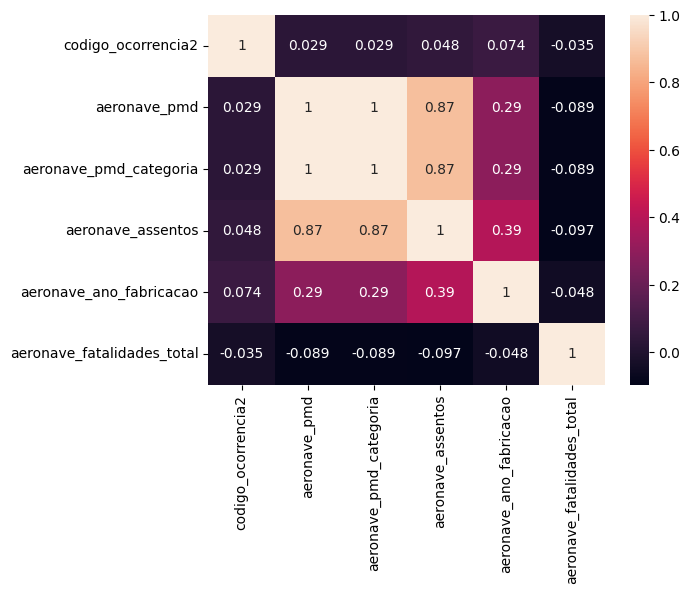

In [ ]:
sns.heatmap(df_aeronaves.corr(), annot=True)